center [array([0.61616162]), array([-0.91919192]), array([0.67676768]), array([0.33333333]), array([0.41414141]), array([0.27272727]), array([0.15151515]), array([-0.7979798]), array([-0.53535354]), array([0.23232323])]
[[8.41506855e-10 9.49101466e-01 1.70480749e-10 6.65836147e-07
  1.12719037e-07 2.35568810e-06 2.47200191e-05 7.21446326e-01
  1.77786712e-01 5.29385210e-06]
 [1.41420789e-09 9.71042777e-01 2.92172073e-10 1.02122184e-06
  1.77457220e-07 3.54293150e-06 3.57501816e-05 7.67618196e-01
  2.05924246e-01 7.85859545e-06]
 [2.36120088e-09 9.87025018e-01 4.97469134e-10 1.55609784e-06
  2.77558261e-07 5.29385210e-06 5.13655312e-05 8.11429096e-01
  2.36962572e-01 1.15899655e-05]
 [3.91666743e-09 9.96740351e-01 8.41506855e-10 2.35568810e-06
  4.31299270e-07 7.85859545e-06 7.33211715e-05 8.52157700e-01
  2.70904428e-01 1.69817887e-05]
 [6.45452870e-09 1.00000000e+00 1.41420789e-09 3.54293150e-06
  6.65836147e-07 1.15899655e-05 1.03980305e-04 8.89105812e-01
  3.07692233e-01 2.47200191e

<ipython-input-16-b5a654ea2b9a>:41: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  y = sin(3*(x+0.5)**3 - 1)
<ipython-input-16-b5a654ea2b9a>:21: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  G = zeros((X.shape[0], self.numCenters), float)
<ipython-input-16-b5a654ea2b9a>:18: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return exp(-self.beta * norm(c-d)**2)
<ipython-input-16-b5a654ea2b9a>:33: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  self.W = dot(pinv(G), Y)
<ipython-input-16-b5a654ea2b9a>:36: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead
  Y = dot(G, self.W)


NameError: name 'pl' is not defined

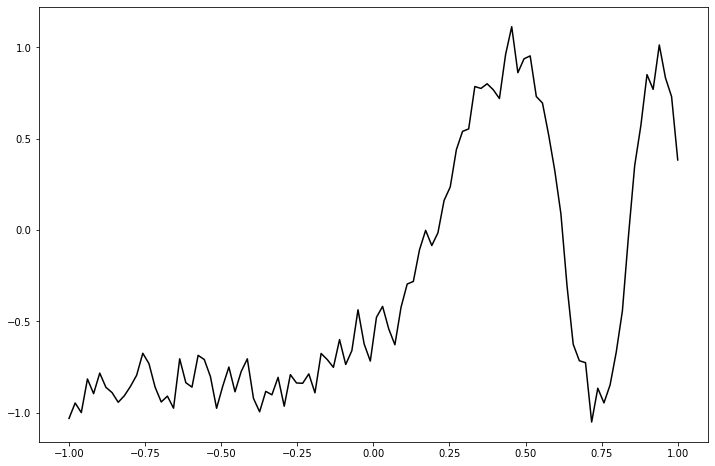

In [16]:
from scipy import *  
from scipy.linalg import norm, pinv  
from matplotlib import pyplot as plt  
class RBF:  
    def __init__ (self, indim, numCenters, outdim):  
        self.indim = indim  
        self.outdim = outdim  
        self.numCenters = numCenters  
        #Here we initialize the center corresponding to the hidden neuron of RBF
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]  
                 #Here we are two important parameters that define the RBF network..
                 #The first parameter represents β, the second represents the connection weight
        self.beta = 8  
        self.W = random.random((self.numCenters, self.outdim))  
           
    def _basisfunc(self, c, d):  
        assert len(d) == self.indim  
        return exp(-self.beta * norm(c-d)**2)  
    def _calcAct(self, X):  
        # calculate activations of RBFs  
        G = zeros((X.shape[0], self.numCenters), float)  
        for ci, c in enumerate(self.centers):  
            for xi, x in enumerate(X):  
                G[xi,ci] = self._basisfunc(c, x)  
        return G  
         #Pass x and y values ​​for training   
    def train(self, X, Y):   
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]  
        self.centers = [X[i,:] for i in rnd_idx]    
        print ("center", self.centers)   
        G = self._calcAct(X)  
        print (G)  
        self.W = dot(pinv(G), Y)  
    def test(self, X):   
        G = self._calcAct(X)  
        Y = dot(G, self.W)  
        return Y  
if __name__ == '__main__':  
    n = 100  
    x = mgrid[-1:1:complex(0,n)].reshape(n, 1)  
    y = sin(3*(x+0.5)**3 - 1)  
    y += random.normal(0, 0.1, y.shape)  
    rbf = RBF(1, 10, 1)  
    rbf.train(x, y)  
    z = rbf.test(x)  
# plot original data  
plt.figure(figsize=(12, 8))  
plt.plot(x, y, 'k-')   
pl.plot(x, z, 'r-', linewidth=2)  
plt.show()
